In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import string

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

#from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [2]:
from joblib import dump, load

In [3]:
#!chmod 644 train.csv
#!chmod 644 test.csv

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
df.shape

(300000, 25)

In [7]:
df = df.drop("id", axis=1)

In [8]:
df1 = df._get_numeric_data()

In [9]:
df2 = df.select_dtypes(include='object')

In [10]:
assert df.shape[1] == df1.shape[1] + df2.shape[1]

In [11]:
len(df2["nom_7"].unique())

1220

In [12]:
for col in df2.columns:
    print(col, ": ", df2[col].unique())
    print("****************************************************************")

bin_3 :  ['T' 'F']
****************************************************************
bin_4 :  ['Y' 'N']
****************************************************************
nom_0 :  ['Green' 'Blue' 'Red']
****************************************************************
nom_1 :  ['Triangle' 'Trapezoid' 'Polygon' 'Square' 'Star' 'Circle']
****************************************************************
nom_2 :  ['Snake' 'Hamster' 'Lion' 'Cat' 'Dog' 'Axolotl']
****************************************************************
nom_3 :  ['Finland' 'Russia' 'Canada' 'Costa Rica' 'China' 'India']
****************************************************************
nom_4 :  ['Bassoon' 'Piano' 'Theremin' 'Oboe']
****************************************************************
nom_5 :  ['50f116bcf' 'b3b4d25d0' '3263bdce5' 'f12246592' '5b0f5acd5' '46cab09da'
 'be5592604' '72f8028dc' '4604905e7' 'ad95dc0ee' '2ff007c26' 'a35c346aa'
 'dbfb714a4' 'e1558b071' '39647c92a' 'ee55b9d67' '416a8f3ab' '91bde92fa'
 '3aa

In [13]:
int("50f116bcf", 16)

21727636431

In [14]:
cols = ["nom_{}".format(i) for i in range(5, 10)]
#df2[df2.columns[df2.columns.str.contains("nom_")]]
cols

['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']

In [15]:
for col in cols:
    df2[col] = df2[col].apply(lambda x: int(x, 16))

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
'''
res = []
for col in cols:
    res.extend(list(df2[col].unique()))

mysnom = list(set(res))

le = LabelEncoder()
le.fit(mysnom)

for col in cols:
    df2[col] = le.transform(df2[col])
'''

'\nres = []\nfor col in cols:\n    res.extend(list(df2[col].unique()))\n\nmysnom = list(set(res))\n\nle = LabelEncoder()\nle.fit(mysnom)\n\nfor col in cols:\n    df2[col] = le.transform(df2[col])\n'

In [17]:
df2[cols].corr()

,nom_5,nom_6,nom_7,nom_8,nom_9
nom_5,1.000000,0.001116,0.002611,-0.001691,-0.001141
nom_6,0.001116,1.000000,-0.000597,-0.000699,-0.004329
nom_7,0.002611,-0.000597,1.000000,-0.000572,-0.000198
nom_8,-0.001691,-0.000699,-0.000572,1.000000,-0.000882
nom_9,-0.001141,-0.004329,-0.000198,-0.000882,1.000000


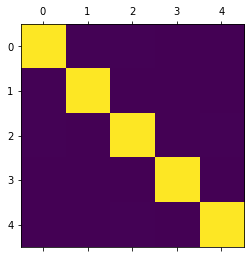

In [18]:
plt.matshow(df2[cols].corr())
plt.show()

In [19]:
df2

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,T,Y,Green,Triangle,Snake,Finland,Bassoon,21727636431,15772387348,28175946729,52488569003,12696894801,Grandmaster,Cold,h,D,kr
1,T,Y,Green,Trapezoid,Hamster,Russia,Piano,48239551952,67590492097,15952860690,20628767313,66635263009,Grandmaster,Hot,a,A,bF
2,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,13526359269,2452503736,44731659559,59756902020,46816824784,Expert,Lava Hot,h,R,Jc
3,F,Y,Red,Trapezoid,Snake,Canada,Oboe,64728884626,21700990058,63461013227,20097444713,35015036273,Grandmaster,Boiling Hot,i,D,kW
4,F,N,Red,Trapezoid,Lion,Canada,Oboe,24443727061,8557928957,1306182334,54563352949,47618683559,Grandmaster,Freezing,a,R,qP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,T,N,Red,Trapezoid,Snake,India,Oboe,14485399999,32358693610,36147448992,31416340209,60171349231,Contributor,Freezing,k,K,dh
299996,F,Y,Green,Trapezoid,Lion,Russia,Piano,19108194839,15995582576,52686091432,15432745588,34612711880,Novice,Freezing,h,W,MO
299997,F,Y,Blue,Star,Axolotl,Russia,Oboe,3739857818,25843487966,50089431811,25090355027,13234913627,Novice,Boiling Hot,o,A,Bn
299998,F,Y,Green,Square,Axolotl,Costa Rica,Piano,60487676017,976479,53869865492,8457865166,45915969835,Master,Boiling Hot,h,W,uJ


In [20]:
cols = ["nom_{}".format(i) for i in range(0, 5)]
#df2[df2.columns[df2.columns.str.contains("nom_")]]
cols

['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']

In [21]:
for col in cols:
    le = LabelEncoder()
    le.fit(df2[col])
    df2[col] = le.transform(df2[col])
#pd.factorize(df2["nom_5"])

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
for col in df2.columns:
    if col.startswith("bin_"):
        le = LabelEncoder()
        le.fit(df2[col])
        df2[col] = le.transform(df2[col])

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
df2["ord_1"] = df2["ord_1"].map({"Novice":0, "Contributor":1, "Expert":2, "Master":3, "Grandmaster":4})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df2["ord_2"].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [25]:
df2["ord_2"] = df2["ord_2"].map({"Freezing":0, "Cold":1, "Warm":2, "Hot":3, "Boiling Hot":4, "Lava Hot":5})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df2["ord_3"] = df2["ord_3"].map({k:v for v,k in enumerate(list(string.ascii_lowercase))})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df2["ord_4"] = df2["ord_4"].map({k:v for v,k in enumerate(list(string.ascii_uppercase))})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
list1 = list(string.ascii_lowercase)

In [29]:
list2 = list(string.ascii_uppercase)

In [30]:
list1.extend(list2)

In [31]:
list1

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [32]:
df2["ord_5"].apply(lambda x: x[0]).map({k:v*10 for v,k in enumerate(list1)})

0         100
1          10
2         350
3         100
4         160
         ... 
299995     30
299996    380
299997    270
299998    200
299999    190
Name: ord_5, Length: 300000, dtype: int64

In [33]:
df2["ord_5"] = df2["ord_5"].apply(lambda x: x[0]).map({k:v*10 for v,k in enumerate(list1)}) +\
df2["ord_5"].apply(lambda x: x[1]).map({k:v for v,k in enumerate(list1)})

/home/ryosuke/miniconda3/envs/myanaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df2

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,1,1,1,5,5,3,0,21727636431,15772387348,28175946729,52488569003,12696894801,4,1,7,3,117
1,1,1,1,4,3,5,2,48239551952,67590492097,15952860690,20628767313,66635263009,4,3,0,0,41
2,0,1,0,4,4,5,3,13526359269,2452503736,44731659559,59756902020,46816824784,2,5,7,17,352
3,0,1,2,4,5,0,1,64728884626,21700990058,63461013227,20097444713,35015036273,4,4,8,3,148
4,0,0,2,4,4,0,1,24443727061,8557928957,1306182334,54563352949,47618683559,4,0,0,17,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,0,2,4,5,4,1,14485399999,32358693610,36147448992,31416340209,60171349231,1,0,10,10,37
299996,0,1,1,4,4,5,2,19108194839,15995582576,52686091432,15432745588,34612711880,0,0,7,22,420
299997,0,1,0,3,0,5,1,3739857818,25843487966,50089431811,25090355027,13234913627,0,4,14,0,283
299998,0,1,1,2,0,2,2,60487676017,976479,53869865492,8457865166,45915969835,3,4,7,22,235


In [35]:
#df2_ = pd.get_dummies(df2)

In [36]:
df2.shape

(300000, 17)

In [37]:
df = pd.concat([df1, df2], axis=1)

In [38]:
del [df2, df1]

In [39]:
df.shape

(300000, 24)

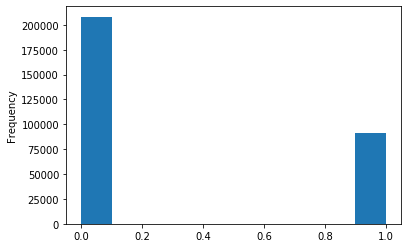

In [40]:
df["target"].plot.hist();

In [41]:
df[df.columns[df.columns.str.contains("nom_")]].corr()

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
nom_0,1.000000,0.000584,0.002540,-0.001180,0.001874,0.001297,-0.000510,-0.003090,-0.001191,-0.000655
nom_1,0.000584,1.000000,0.001541,-0.000990,0.003171,0.000861,0.001020,0.000966,-0.000589,0.002718
nom_2,0.002540,0.001541,1.000000,-0.002646,-0.001828,-0.000456,0.001933,-0.002129,-0.002076,0.005596
nom_3,-0.001180,-0.000990,-0.002646,1.000000,-0.001529,-0.001079,-0.000772,0.000210,0.002945,0.004464
nom_4,0.001874,0.003171,-0.001828,-0.001529,1.000000,0.000737,0.002503,0.003589,0.001570,-0.001985
nom_5,0.001297,0.000861,-0.000456,-0.001079,0.000737,1.000000,0.001116,0.002611,-0.001691,-0.001141
nom_6,-0.000510,0.001020,0.001933,-0.000772,0.002503,0.001116,1.000000,-0.000597,-0.000699,-0.004329
nom_7,-0.003090,0.000966,-0.002129,0.000210,0.003589,0.002611,-0.000597,1.000000,-0.000572,-0.000198
nom_8,-0.001191,-0.000589,-0.002076,0.002945,0.001570,-0.001691,-0.000699,-0.000572,1.000000,-0.000882
nom_9,-0.000655,0.002718,0.005596,0.004464,-0.001985,-0.001141,-0.004329,-0.000198,-0.000882,1.000000


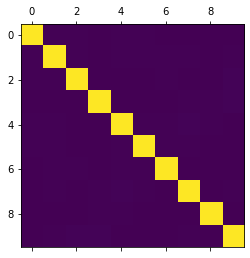

In [42]:
plt.matshow(df[df.columns[df.columns.str.contains("nom_")]].corr())
plt.show()

In [43]:
y = df["target"].values

In [44]:
df.drop(["target"], axis=1, inplace=True)

In [45]:
X = df.values

In [46]:
del df

In [47]:
print(X.shape, y.shape)

(300000, 23) (300000,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
#clf = load('clf.joblib') 

In [50]:
#clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, 
#                                 max_depth=7, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [51]:
#clf = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.01, 
#                                 max_depth=15, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [52]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, 
                                 max_depth=7, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7442626262626263

In [55]:
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
dump(clf, 'clf.joblib') 

['clf.joblib']

In [54]:
# test
#df = pd.read_csv("test.csv")
#df["target"] = clf.predict()
#sub = df[["id", "target"]]
#sub.to_csv("submission.csv", index=False)